<a href="https://colab.research.google.com/github/CavalcantePedro/Introdu-o_Intelig-ncia_artificial_UFPB/blob/main/Prova_II_Int_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROVA 02 - INTRODUÇÃO A INTELIGÊNCIA ARTIFICIAL**

# **Questão** 1

Vou explorar o  seguinte conjunto de dados sobre raças de cães  *https://tmfilho.github.io/akcdata/* e aplicarei os algoritmos de classificação exigidos (Árvore de Decisão, Naive Bayes e MLP). Abordarei o pré-processamento dos dados utilizados, a validação estratificada 10-fold, a técnica de redimensionamento de atributos PCA (Análise de Componentes Principais) e as métricas F1-score e matriz de confusão que foram utilizadas para avaliar o desempenho dos modelos de classificação.

## **1. Importando bibliotecas**

In [ ]:
import pandas as pd #Usada para manipulação de dados.
import numpy as np  #Usada para manipulação de dados.
import matplotlib.pyplot as plt #Usada para visualização de dados.
import seaborn as sns           #Usada para visualização de dados.
from IPython.display import display # usada para exibir o DataFrame no notebook Jupyter.
from sklearn.model_selection import StratifiedKFold   #Para validação cruzada estratificada
from sklearn.model_selection import cross_val_predict #para fazer previsões usando validação cruzada.
from sklearn.preprocessing import StandardScaler, OneHotEncoder #StandardScaler para normalização de recursos e OneHotEncoder para codificação one-hot de recursos categóricos.
from sklearn.impute import SimpleImputer #para preenchimento de valores ausentes.
from sklearn.pipeline import Pipeline    #para encadear várias etapas de pré-processamento e modelagem.
from sklearn.compose import ColumnTransformer #ara aplicar diferentes pré-processadores a diferentes colunas.
from sklearn.tree import DecisionTreeClassifier #para classificação usando árvores de decisão.
from sklearn.naive_bayes import GaussianNB # para classificação usando Naive Bayes Gaussiano.
from sklearn.neural_network import MLPClassifier #para classificação usando redes neurais.
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix # para calcular métricas de classificação
from sklearn.decomposition import PCA #para redução de dimensionalidade usando Análise de Componentes Principais.



## **2. Pré-processamento de Dados**

Realizo o pré-processamento dos dados, que inclui carregar o conjunto de dados, tratar valores ausentes e transformar variáveis categóricas em numéricas.

### Carregamento dos conjuntos de dados

A URL do conjunto de dados que será usado. O conjunto de dados está hospedado no GitHub.

In [ ]:
url = "https://raw.githubusercontent.com/tmfilho/akcdata/master/data/akc-data-latest.csv"

Uma lista dos nomes das colunas do conjunto de dados. Esses nomes serão usados para criar o DataFrame. Uso isso pois na base de dados utilizada a coluna que contem as raças não esta nomeada.

In [ ]:
column_names = ['breed', 'description', 'temperament', 'popularity', 'min_height', 'max_height',
                'min_weight', 'max_weight', 'min_expectancy', 'max_expectancy', 'group',
                'grooming_frequency_value', 'grooming_frequency_category', 'shedding_value', 'shedding_category',
                'energy_level_value', 'energy_level_category', 'trainability_value', 'trainability_category',
                'demeanor_value', 'demeanor_category']

Leio o conjunto de dados da URL especificada, usando os nomes das colunas fornecidos, e crio um DataFrame pandas.
O parâmetro 'header=0' é porque a primeira linha do arquivo CSV usado contém os nomes das colunas.

In [ ]:
data = pd.read_csv(url, names=column_names , header=0)

Exibo as primeiras 5 linhas do DataFrame. Isso é útil para ter uma visão geral dos dados.

In [ ]:
display(data.head())

,breed,description,temperament,popularity,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,...,grooming_frequency_value,grooming_frequency_category,shedding_value,shedding_category,energy_level_value,energy_level_category,trainability_value,trainability_category,demeanor_value,demeanor_category
0,Affenpinscher,The Affen’s apish look has been described many...,"Confident, Famously Funny, Fearless",148,22.86,29.21,3.175147,4.535924,12.0,15.0,...,0.6,2-3 Times a Week Brushing,0.6,Seasonal,0.6,Regular Exercise,0.8,Easy Training,1.0,Outgoing
1,Afghan Hound,"The Afghan Hound is an ancient breed, his whol...","Dignified, Profoundly Loyal, Aristocratic",113,63.50,68.58,22.679619,27.215542,12.0,15.0,...,0.8,Daily Brushing,0.2,Infrequent,0.8,Energetic,0.2,May be Stubborn,0.2,Aloof/Wary
2,Airedale Terrier,The Airedale Terrier is the largest of all ter...,"Friendly, Clever, Courageous",60,58.42,58.42,22.679619,31.751466,11.0,14.0,...,0.6,2-3 Times a Week Brushing,0.4,Occasional,0.6,Regular Exercise,1.0,Eager to Please,0.8,Friendly
3,Akita,"Akitas are burly, heavy-boned spitz-type dogs ...","Courageous, Dignified, Profoundly Loyal",47,60.96,71.12,31.751466,58.967008,10.0,13.0,...,0.8,Daily Brushing,0.6,Seasonal,0.8,Energetic,1.0,Eager to Please,0.6,Alert/Responsive
4,Alaskan Malamute,The Alaskan Malamute stands 23 to 25 inches at...,"Affectionate, Loyal, Playful",58,58.42,63.50,34.019428,38.555351,10.0,14.0,...,0.6,2-3 Times a Week Brushing,0.6,Seasonal,0.8,Energetic,0.4,Independent,0.8,Friendly


### Tratamento dos dados

 A função drop() está sendo usada para remover a coluna 'demeanor_category' do DataFrame ***data***.
 O resultado é armazenado na variável ***X***, que agora contém todas as colunas do DataFrame original, exceto 'demeanor_category'.
 Fiz isso porque 'demeanor_category' é o que quero prever (ou seja, é o **alvo**), então não incluo nos recursos de entrada.
A coluna 'demeanor_category' é selecionada do DataFrame ***data*** e armazenada na variável ***y***.

In [ ]:
# Separando atributos de entrada e alvo
X = data.drop(columns=['demeanor_category'])
y = data['demeanor_category']

Crio um objeto SimpleImputer com a estratégia '***most_frequent***', que preenche os valores ausentes com o valor mais frequente na coluna.
O método 'reshape(-1, 1)' é usado para transformar '**y**' em uma matriz bidimensional, que é o que 'fit_transform()' espera como entrada, ai como fit_transform retorna um array numpy, usamos o método pd.Series() para transformá-lo de volta em um pandas Series e remover a dimensão extra com 'flatten()'.

In [ ]:
# Crio um imputer e aplico o imputer a y
imputer = SimpleImputer(strategy='most_frequent')
y = imputer.fit_transform(y.values.reshape(-1, 1))
y = pd.Series(y.flatten())

Faço uma separação entre as colunas numéricas e as colunas categóricas, primeiro seleciono as colunas numéricas do DataFrame '**X**' e armazeno os nomes das colunas em '**numeric_features**', segundo seleciono as colunas categóricas do DataFrame '**X**' e armazeno os nomes das colunas em '**categorical_features**'.

In [ ]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

Crio um pipeline para pré-processar as características numéricas. Primeiro, os valores ausentes são preenchidos com a mediana da coluna. Em seguida, os valores são normalizados para ter média 0 e desvio padrão 1.

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

Crio um pipeline para pré-processar as características categóricas. Primeiro, os valores ausentes são preenchidos com o valor mais frequente na coluna. Em seguida, os valores categóricos são codificados usando codificação one-hot.

In [ ]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

E porfim, crio um transformador de colunas que aplica o pré-processador numérico às características numéricas e o pré-processador categórico às características categóricas. O parâmetro 'sparse_threshold=0' garante que o resultado seja uma matriz densa.

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)],
    sparse_threshold=0)  # Definindo o limite de densidade como 0 para evitar data frames esparsos

## **3. Algoritmo de Árvore de Decisão**

### Avaliação com Todos os Atributos

Crio um objeto DecisionTreeClassifier com uma semente aleatória fixa para garantir a reprodutibilidade dos resultados.

In [ ]:
model_dt = DecisionTreeClassifier(random_state=42)

Crio uma pipeline que primeiro aplica o pré-processador definido anteriormente e, em seguida, treina o classificador de árvore de decisão.

In [ ]:
pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model_dt)
])

Defino um objeto StratifiedKFold para validação cruzada estratificada. Isso garante que as proporções das classes alvo sejam as mesmas em cada fold que no conjunto de dados completo. Uso validação cruzada para fazer previsões no conjunto de dados. Isso envolve dividir o conjunto de dados em 8 partes (ou "folds"), treinar o modelo em 7 delas e fazer previsões na 8ª. Isso é repetido 8 vezes, cada vez com uma fold diferente usada para teste.

In [ ]:
skf = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)
y_pred_dt = cross_val_predict(pipeline_dt, X, y, cv=skf)

Calculo a acurácia das previsões, que é a proporção de previsões corretas e calculo o F1-score das previsões, que é uma medida que combina precisão e recall.

In [ ]:
accuracy_dt = accuracy_score(y, y_pred_dt)
f1_dt = f1_score(y, y_pred_dt, average='weighted')

### Resultados encontrados

In [ ]:
print("Modelo: Árvore de Decisão com Todos os Atributos")
print("Acurácia:", accuracy_dt)
print("F1-Score:", f1_dt)

Modelo: Árvore de Decisão com Todos os Atributos
Acurácia: 0.9711191335740073
F1-Score: 0.9712054010970979


### Matriz de confusão

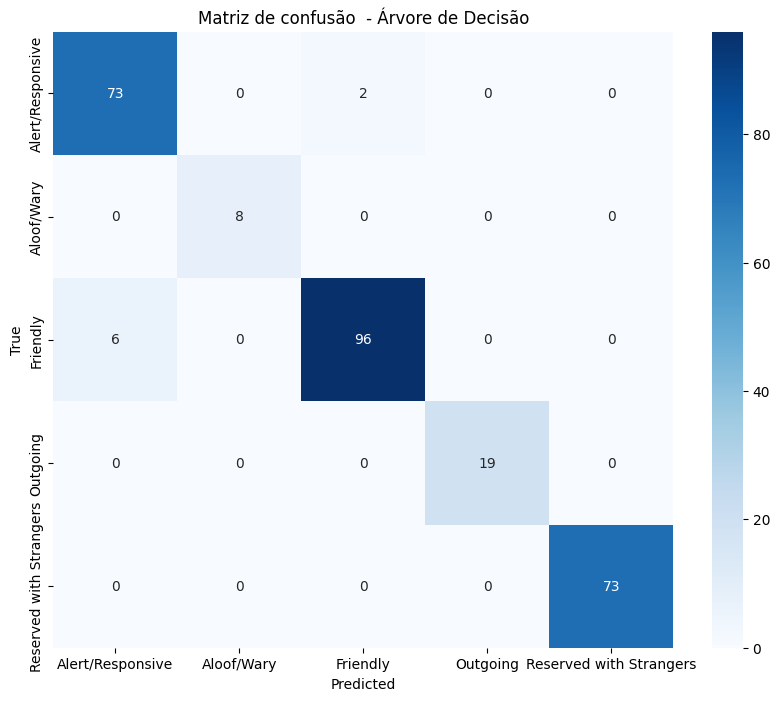

In [ ]:
cm_dt = confusion_matrix(y, y_pred_dt)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de confusão  - Árvore de Decisão')
plt.show()

### Avaliação com Redução de Dimensionalidade (PCA)

Crio um pipeline que primeiro aplica o pré-processador definido anteriormente, em seguida, aplico a Análise de Componentes Principais (PCA) para reduzir a dimensionalidade dos dados, e finalmente treina o classificador de árvore de decisão. O parâmetro 'n_components=0.95' para PCA significa que quero manter 95% da variância nos dados.

In [ ]:
pipeline_dt_pca = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=0.95)),
    ('classifier', model_dt)
])

Realizando a validação cruzada estratificada de 10-fold

In [ ]:
skf = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)
y_pred_dt_pca = cross_val_predict(pipeline_dt_pca, X, y, cv=skf)

Calculando métricas de avaliação

In [ ]:
accuracy_dt_pca = accuracy_score(y, y_pred_dt_pca)
f1_dt_pca = f1_score(y, y_pred_dt_pca, average='weighted')

### Resultados encontrados com PCA

In [ ]:
print("Modelo: Decision Tree com PCA")
print("Acurácia:", accuracy_dt_pca)
print("F1-Score:", f1_dt_pca)

Modelo: Decision Tree com PCA
Acurácia: 0.5054151624548736
F1-Score: 0.5019262799913579


### Matriz de confusão PCA

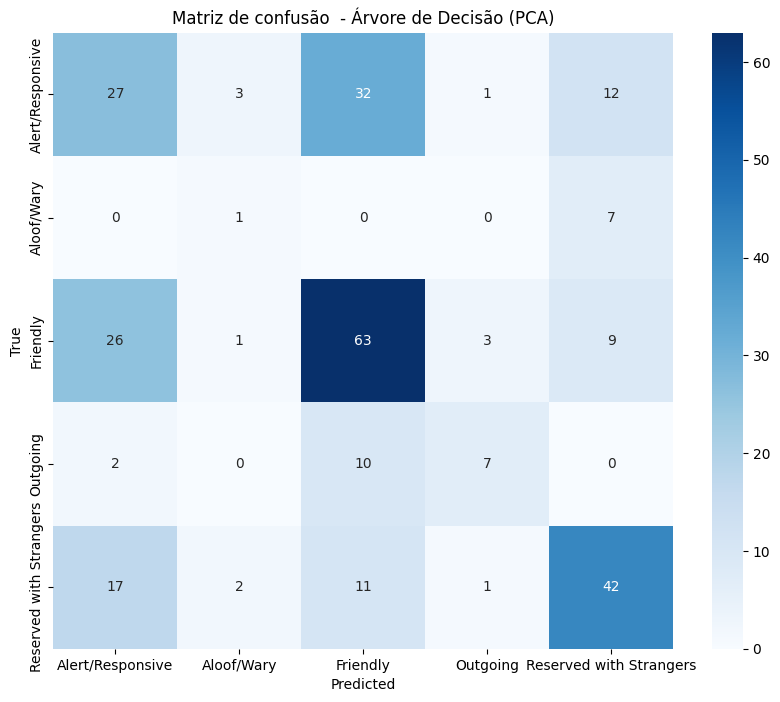

In [ ]:
# Matriz de confusão
cm_dt = confusion_matrix(y, y_pred_dt_pca)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de confusão  - Árvore de Decisão (PCA)')
plt.show()


## **4. Algoritmo de Naive Bayes**

### Avaliação com Todos os Atributos

Crio um objeto GaussianNB, que é um classificador Naive Bayes Gaussiano.

In [ ]:
model_nb = GaussianNB()

Crio um pipeline que primeiro aplica o pré-processador definido anteriormente e, em seguida, treina o classificador Naive Bayes Gaussiano.

In [ ]:
pipeline_nb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model_nb)
])

Realizo a validação cruzada estratificada

In [ ]:
skf = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)
y_pred_nb = cross_val_predict(pipeline_nb, X, y, cv=skf)

Calculo a acurácia das previsões, que é a proporção de previsões corretas e calculo o F1-score das previsões, que é uma medida que combina precisão e recall.

In [ ]:
accuracy_nb = accuracy_score(y, y_pred_nb)
f1_nb = f1_score(y, y_pred_nb, average='weighted')

### Resultados encontrados

In [ ]:
print("Modelo: Naive Bayes com Todos os Atributos")
print("Acurácia:", accuracy_nb)
print("F1-Score:", f1_nb)

Modelo: Naive Bayes com Todos os Atributos
Acurácia: 0.8664259927797834
F1-Score: 0.8577847248431963


### Matriz de confusão

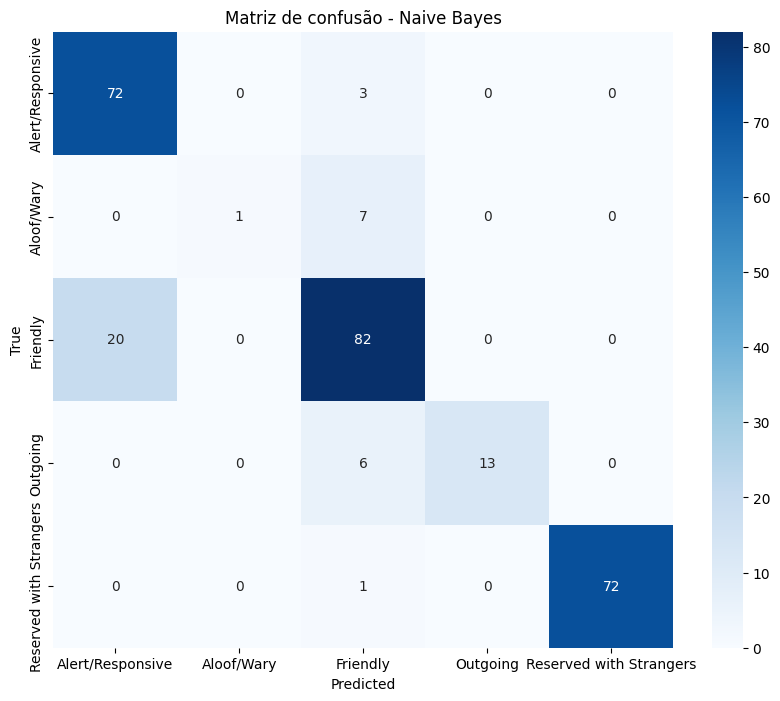

In [ ]:
cm_nb = confusion_matrix(y, y_pred_nb)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de confusão - Naive Bayes')
plt.show()

### Avaliação com Redução de Dimensionalidade (PCA)

Crio um pipeline que primeiro aplica o pré-processador definido anteriormente, em seguida, aplico a Análise de Componentes Principais (PCA) para reduzir a dimensionalidade dos dados, e finalmente treino o classificador Naive Bayes Gaussiano. O parâmetro 'n_components=0.95' para PCA significa que quero manter 95% da variância nos dados.

In [ ]:
pipeline_nb_pca = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=0.95)),
    ('classifier', model_nb)
])

Realizo a validação cruzada estratificada

In [ ]:
skf = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)
y_pred_nb_pca = cross_val_predict(pipeline_nb_pca, X, y, cv=skf)

Calculo a acurácia das previsões, que é a proporção de previsões corretas e calculo o F1-score das previsões, que é uma medida que combina precisão e recall.

In [ ]:
accuracy_nb_pca = accuracy_score(y, y_pred_nb_pca)
f1_nb_pca = f1_score(y, y_pred_nb_pca, average='weighted')

### Resultados encontrados com PCA

In [ ]:
print("Modelo: Naive Bayes com PCA")
print("Acurácia:", accuracy_nb_pca)
print("F1-Score:", f1_nb_pca)

Modelo: Naive Bayes com PCA
Acurácia: 0.07942238267148015
F1-Score: 0.09300793884686803


### Matriz de confusão PCA

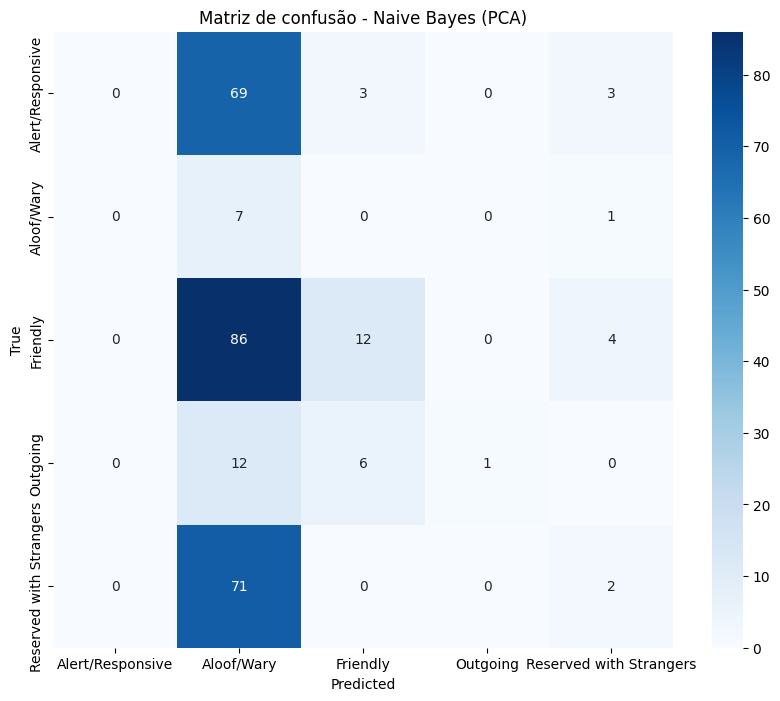

In [ ]:
cm_nb = confusion_matrix(y, y_pred_nb_pca)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de confusão - Naive Bayes (PCA)')
plt.show()

## **5. Algoritmo de MLP (Multi-layer Perceptron)**

### Avaliação com Todos os Atributos

Definindo o modelo MLP, o número máximo de iterações foi aumentado para 500, pois isso permitirá que o modelo treine por mais tempo, utilizei a solução de aumentar o número de interações para esse modelo pois o treinamento da rede neural não tava sendo concluido.

In [ ]:
model_mlp = MLPClassifier(max_iter=500, random_state=42)

Pipeline para pré-processamento e classificação

In [ ]:
pipeline_mlp = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model_mlp)
])

Realizo a validação cruzada estratificad

In [ ]:
skf = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)
y_pred_mlp = cross_val_predict(pipeline_mlp, X, y, cv=skf)

Calculo métricas de avaliação

In [ ]:
accuracy_mlp = accuracy_score(y, y_pred_mlp)
f1_mlp = f1_score(y, y_pred_mlp, average='weighted')

### Resultados encontrados

In [ ]:
print("Modelo: MLP com Todos os Atributos")
print("Acurácia:", accuracy_mlp)
print("F1-Score:", f1_mlp)

Modelo: MLP com Todos os Atributos
Acurácia: 0.6353790613718412
F1-Score: 0.6069391233794956


### Matriz de confusão

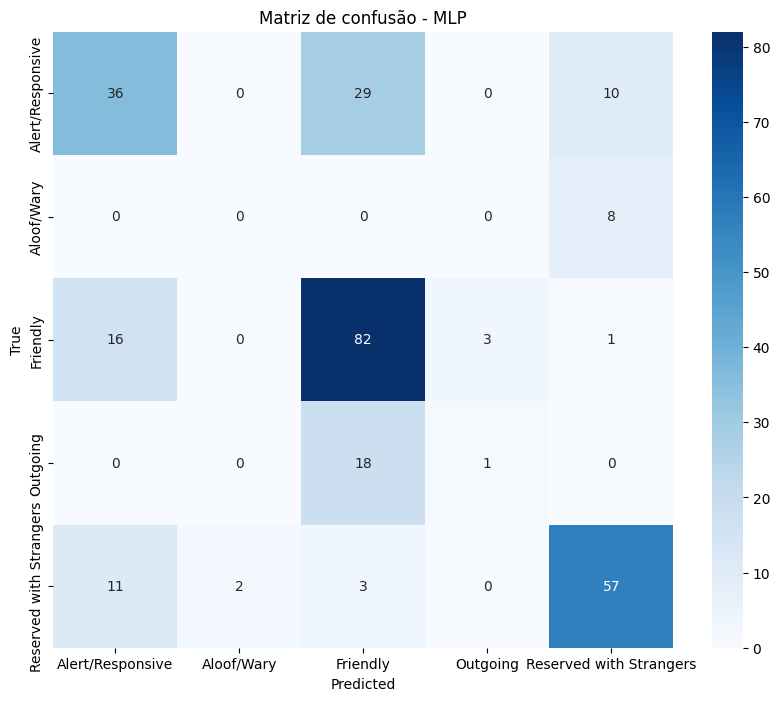

In [ ]:
cm_mlp = confusion_matrix(y, y_pred_mlp)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_mlp, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de confusão - MLP')
plt.show()

### Avaliação com Redução de Dimensionalidade (PCA)

In [ ]:
pipeline_mlp_pca = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=0.95)),  # Manter 95% da variância explicada
    ('classifier', model_mlp)
])

skf = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)
y_pred_mlp_pca = cross_val_predict(pipeline_mlp_pca, X, y, cv=skf)

accuracy_mlp_pca = accuracy_score(y, y_pred_mlp_pca)
f1_mlp_pca = f1_score(y, y_pred_mlp_pca, average='weighted')

### Resultados encontrados com PCA

In [ ]:
print("Modelo: MLP com PCA")
print("Acurácia:", accuracy_mlp_pca)
print("F1-Score:", f1_mlp_pca)

Modelo: MLP com PCA
Acurácia: 0.6425992779783394
F1-Score: 0.6185150414351771


### Matriz de confusão PCA

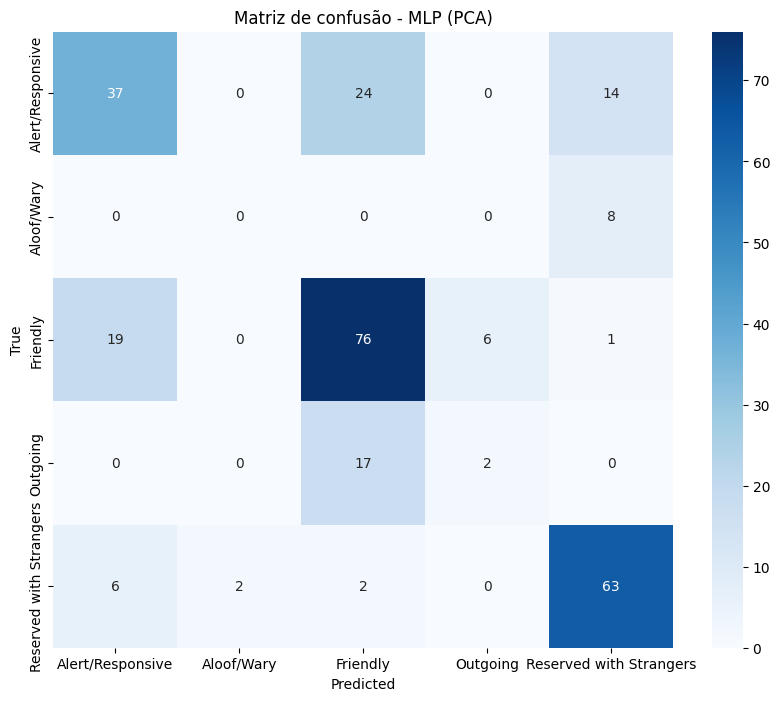

In [ ]:
cm_mlp = confusion_matrix(y, y_pred_mlp_pca)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_mlp, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de confusão - MLP (PCA)')
plt.show()

# **Questão 2**

### **Importando classes necessárias**

Importo as classes AgglomerativeClustering e KMeans para agrupamento, e silhouette_score para avaliação de agrupamento.

In [ ]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score

### **Processamento de dados**

Primeiro, aplicamquei o pré-processador aos dados de entrada 'X' e armazenei o resultado em 'X_processed'.

In [ ]:
X_processed = preprocessor.fit_transform(X)

### **K-Means**

Em seguida, realizei o agrupamento K-Means nos dados. Para determinar o número ideal de clusters, calculei a inércia (a soma das distâncias quadradas das amostras ao centro do cluster mais próximo) para diferentes números de clusters e plotei os resultados em um gráfico de cotovelo.

Text(0, 0.5, 'Inércia')

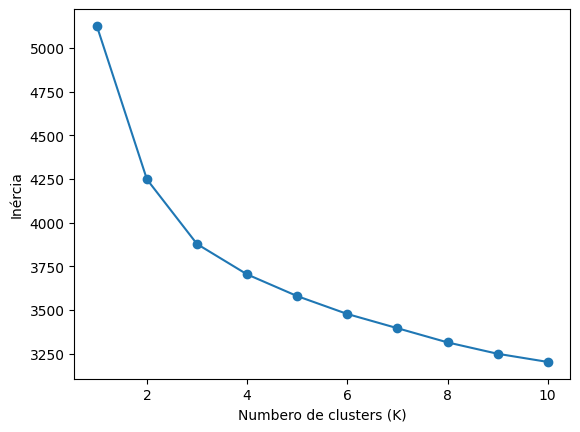

In [ ]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_processed)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Inércia')

### **Agrupamento Hierárquico**

Também realizei o agrupamento hierárquico nos dados, usando os métodos de ligação 'ward' e 'complete'.

In [ ]:
hierarchical_ward = AgglomerativeClustering(n_clusters=5, linkage='ward')
ward_labels = hierarchical_ward.fit_predict(X_processed)

hierarchical_complete = AgglomerativeClustering(n_clusters=5, linkage='complete')
complete_labels = hierarchical_complete.fit_predict(X_processed)

### **Avaliação de Agrupamento**

Finalmente, calculei o coeficiente de silhueta para os resultados do K-Means e do agrupamento hierárquico. O coeficiente de silhueta é uma medida de quão semelhante um objeto é ao seu próprio cluster (coesão) em comparação com outros clusters (separação).

In [ ]:
silhouette_kmeans = silhouette_score(X_processed, kmeans_labels)
silhouette_ward = silhouette_score(X_processed, ward_labels)
silhouette_complete = silhouette_score(X_processed, complete_labels)

print("Coeficiente de Silhueta (K-means):", silhouette_kmeans)
print("Coeficiente de Silhueta (Hierárquico - Ward):", silhouette_ward)
print("Coeficiente de Silhueta (Hierárquico - Complete):", silhouette_complete)

Coeficiente de Silhueta (K-means): 0.07547840500862892
Coeficiente de Silhueta (Hierárquico - Ward): 0.08199328661825042
Coeficiente de Silhueta (Hierárquico - Complete): 0.08250218219577662
